# Phase 1: Data Preparation</h1>

In [60]:
!pip install geopy

## General Info

In [185]:
import pandas as pd


In [186]:
df=pd.read_csv('Egyptian Doctors Data.csv')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source             1210 non-null   object 
 1   web_scraper_order  1210 non-null   object 
 2   specialization     1208 non-null   object 
 3   fees               1209 non-null   object 
 4   avg_rate           1151 non-null   float64
 5   waiting_time       1152 non-null   object 
 6   clinic_location    927 non-null    object 
 7   rate_count         1153 non-null   object 
 8   doctor_views       1208 non-null   object 
 9   pages              845 non-null    object 
dtypes: float64(1), object(9)
memory usage: 94.7+ KB


In [188]:
df.describe()

,avg_rate
count,1151.000000
mean,4.758471
std,0.309775
min,4.000000
25%,4.500000
50%,5.000000
75%,5.000000
max,5.000000


### Add Random Names<h3>

### Random doctors names</h3>

In [189]:
import pandas as pd
import random


first_names = [
    "Ahmed", "Mohamed", "Omar", "Youssef", "Ali", "Hassan", "Mostafa", "Khaled",
    "Amr", "Tamer", "Mahmoud", "Ibrahim", "Sami", "Adel", "Nader", "Fady",
    "Mona", "Sara", "Nour", "Aya", "Laila", "Dina", "Fatma", "Heba",
    "Rania", "Mariam", "Salma", "Noha", "Reem", "Amira", "Yasmin", "Nadia",
    "Salim", "Bassam", "Walid", "Hani", "Rami", "Jamal", "Zein", "Firas"
]

last_names = [
    "El-Sayed", "Hassan", "Abdelrahman", "Fahmy", "Mahmoud", "Ibrahim", "Salah",
    "Mostafa", "Kamel", "Nasser", "Farouk", "Youssef", "Gaber", "Saeed",
    "Hussein", "Zaki", "Taha", "Shalaby", "El-Masry", "Abdallah", "Khalil",
    "Samir", "Fathy", "El-Gohary", "El-Baz", "El-Din", "Mansour", "El-Hadidy",
    "El-Kholy", "El-Shazly", "El-Sherif", "El-Amin", "El-Sherbiny", "El-Khatib",
    "El-Naggar", "El-Saied", "El-Shennawy", "El-Mahdy", "El-Kassas", "El-Gendy"
]

all_combinations = [f"{fn} {ln}" for fn in first_names for ln in last_names]

'''if len(all_combinations) < 1200:
    raise ValueError("Not enough unique name combinations to generate 1200 unique names.")
'''
random.seed(42)
selected_names = random.sample(all_combinations, len(df))

df['Doctor_Name'] = selected_names

print(df.head())


  Source web_scraper_order   specialization     fees  avg_rate  \
0  0 (1)    1676137334-729  Physiotherapist   65 EGP       5.0   
1  1 (1)    1676137337-730    Dermatologist  200 EGP       4.5   
2  2 (1)    1676137340-731      Orthopedist  250 EGP       4.5   
3  3 (1)    1676137343-732     Gynecologist  150 EGP       NaN   
4  4 (1)    1676137345-733    Dermatologist  200 EGP       5.0   

                waiting_time clinic_location        rate_count   doctor_views  \
0  Waiting Time : 15 Minutes     El-Mansoura  From 16 Visitors  1,707 View(s)   
1  Waiting Time : 35 Minutes    El-Ibrahimia  From 68 Visitors  8,188 View(s)   
2  Waiting Time : 31 Minutes  6th of October  From 29 Visitors  1,745 View(s)   
3                        NaN        El-Haram               NaN  1,155 View(s)   
4  Waiting Time : 20 Minutes       Nasr City  From 90 Visitors  4,054 View(s)   

  pages      Doctor_Name  
0  1048  Salim El-Shazly  
1  1048  Hassan El-Kholy  
2  1048  Mohamed Youssef  
3  1048 

## Data Selection<h2>

In [190]:
df=df[['Doctor_Name','specialization','avg_rate','clinic_location']]

## Check Missings</h2>

In [191]:
df.isnull().sum()

Doctor_Name          0
specialization       2
avg_rate            59
clinic_location    283
dtype: int64

In [192]:
df['specialization'] = df['specialization'].dropna()
df['avg_rate'] = df['avg_rate'].fillna(df['avg_rate'].mean())
df['specialization'] = df['specialization'].fillna(df['specialization'].mode()[0])


In [193]:
df = df.dropna(subset=['clinic_location'])

In [194]:
df.isnull().sum()

Doctor_Name        0
specialization     0
avg_rate           0
clinic_location    0
dtype: int64

## Feature Engineering</h2>

### Added a general section for each doctor's specialization</h3>

In [195]:
import pandas as pd


category_map = {
    'Physiotherapist': 'Musculoskeletal',
    'Dermatologist': 'Skin',
    'Orthopedist': 'Musculoskeletal',
    'Gynecologist': 'Urinary and Reproductive',
    'Pediatrician': 'Others',
    'Cardiologist': 'Cardiovascular',
    'General Surgeon': 'Musculoskeletal',
    'Urologist': 'Urinary and Reproductive',
    'Neurosurgeon': 'Neurological and Psychiatric',
    'Nephrologist': 'Urinary and Reproductive',
    'Neurologist': 'Neurological and Psychiatric',
    'ENT Doctor': 'Eye, Ear and Nose',
    'Ophthalmologist': 'Eye, Ear and Nose',
    'Internist': 'Others',
    'Cardiothoracic Surgeon': 'Cardiovascular',
    'Psychiatrist': 'Neurological and Psychiatric',
    'Dentist': 'Others',
    'Endocrinologist': 'Others',
    'Rheumatologist': 'Musculoskeletal',
    'Gastroenterologist': 'Gastrointestinal and Liver',
    'Plastic Surgeon': 'Musculoskeletal',
    'Pulmonologist': 'Respiratory',
    'Audiologist': 'Eye, Ear and Nose',
    'Hematologist': 'Cardiovascular',
    'Nutritionist': 'Others',
    'Surgical Oncologist': 'Gastrointestinal and Liver',
    'Oncologist': 'Others',
    'Hepatologist': 'Gastrointestinal and Liver',
    'Infertility Specialist': 'Urinary and Reproductive',
    'Andrologist': 'Urinary and Reproductive',
    'Obesity Surgeon': 'Urinary and Reproductive',
    'Allergist': 'Skin',
    'Vascular Surgeon': 'Musculoskeletal',
    'Pediatric Surgeon': 'Urinary and Reproductive',
    'Phoniatrician': 'Eye, Ear and Nose',
    'Anesthesiologist': 'Others',
    'Spinal Surgeon': 'Musculoskeletal',
    'Family Doctor': 'Others'
}

df['Category'] = df['specialization'].map(category_map)

df['Category'] = df['Category'].fillna('Unknown')



In [196]:
df['Category'].unique()

array(['Musculoskeletal', 'Skin', 'Urinary and Reproductive', 'Others',
       'Cardiovascular', 'Neurological and Psychiatric',
       'Eye, Ear and Nose', 'Gastrointestinal and Liver', 'Respiratory'],
      dtype=object)

### Remove special characters from location</h3>

In [197]:
df['clinic_location'].unique()

array(['El-Mansoura', 'El-Ibrahimia', '6th of October', 'El-Haram',
       'Nasr City', 'El-Dokki', 'Yousef Abbas',
       'El-Maadi : Zahraa El Maadi Road Carefour',
       'Shoubra El-Kheima : 15th may', 'Moharam Bek : moharam bek',
       'El-Mohandessin : el Sudan Street',
       'Nasr City : Zaker Hussien Street-District 7',
       'Nasr City : Ibrahim Nawar parallel to Ahmed Fakhry - Sixth Region.',
       'Shoubra El-Kheima', 'El-Zagazig : al kwmya street', 'Shoubra',
       'New Cairo : beside new cairo court',
       'El-Mansoura : sandob square', 'El-Mokattam : Street 9',
       'El-Sheikh Zayed : Mouez plaza-', 'Tanta : Elmoderya st',
       'El-Giza : Morad street', 'Shoubra El-Kheima : 15 May, St.',
       'El-Zaitoun : Seliem El Awal', 'Hadayek El-Ahram', 'El-Abbasia',
       'El-Mohandessin : ahmed orabi', 'El-Mokattam',
       'El-Maadi : 77 Street Extension - Arab El Maadi',
       'Faisal : faisal main street', 'New Cairo',
       'Nasr City : Ahmed qasim branched fro

### Retrieve Locations latitude and longitude<h3>

# ❌❌pass :Skip this part, it is already done

<h4>latitude and longitude Exact Location</h4>

In [9]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="my_app")

unique_locations = df['clinic_location'].unique()
results = []
failed = []

for loc in unique_locations:
    query = loc
    lat, lon = None, None
    
    try:
        location = geolocator.geocode(query, timeout=10)
        
        if not location:
            location = geolocator.geocode(f"{loc}, Egypt", timeout=10)
        
        if location:
            lat, lon = location.latitude, location.longitude
        else:
            failed.append(loc)
            
    except Exception as e:
        failed.append(loc)
        print(f"Error for {loc}: {e}")
    
    results.append({'clinic_location': loc, 'latitude': lat, 'longitude': lon})
    
    time.sleep(1) 

locations_df = pd.DataFrame(results)
print("Sample results:\n", locations_df.head())

if failed:
    pd.DataFrame(failed, columns=["failed_location"]).to_csv("failed_locations.csv", index=False)
    print(f"\nSaved {len(failed)} failed locations to failed_locations.csv")


Sample results:
   clinic_location   latitude  longitude
0     El-Mansoura  36.786091   9.900016
1    El-Ibrahimia  28.424375  30.793289
2  6th of October  29.972346  30.940921
3        El-Haram  29.994266  31.160459
4       Nasr City  30.052118  31.342205

Saved 396 failed locations to failed_locations.csv


In [12]:
accepted_locations=locations_df.dropna()

In [ ]:
accepted_locations

<h4>Save Valid Locations</h4>
<p>Exact Format : just mapping</p>

In [16]:
accepted_locations.to_csv('Valid Locations.csv') #دي بشكلها الكامل العنوان تبيكال

<h4>Fix invalid locations</h4>

<h5>for general location</h5>

In [98]:
import pandas as pd
ndf=pd.read_csv('failed_locations.csv')

In [99]:
ndf['general_location'] = ndf['failed_location'].str.split(':').str[0].str.strip()

In [100]:
ndf['general_location'].nunique()

84

<h5>Retrieve Longitude , Latitude based on General Locatioons </h5>

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="my_app")

unique_locations = ndf['general_location'].unique()
results = []
failed = []

for loc in unique_locations:
    query = loc
    lat, lon = None, None
    
    try:
        location = geolocator.geocode(query, timeout=10)
        
        if not location:
            location = geolocator.geocode(f"{loc}, Egypt", timeout=10)
        
        if location:
            lat, lon = location.latitude, location.longitude
        else:
            failed.append(loc)
            
    except Exception as e:
        failed.append(loc)
        print(f"Error for {loc}: {e}")
    
    results.append({'general_location': loc, 'latitude': lat, 'longitude': lon})
    
    time.sleep(1) 

locations_df = pd.DataFrame(results)

valid_df = locations_df[locations_df['latitude'].notnull()]
invalid_df = locations_df[locations_df['latitude'].isnull()]


In [19]:

print(f"✅ Saved {len(valid_df)} valid locations to general_location_valid.csv")
print(f"❌ Saved {len(invalid_df)} failed locations to general_location_invalid.csv")


✅ Saved 67 valid locations to general_location_valid.csv
❌ Saved 17 failed locations to general_location_invalid.csv


<h5>Save Valid General Locations and InValid General Locations</h5>
<p>Exact Format : just mapping</p>

In [ ]:
#دا بالعنوان الاساسي محتاجة اعمل  mapping
valid_df.to_csv("general_location_valid.csv", index=False)
invalid_df.to_csv("general_location_invalid.csv", index=False)


# ✅✅Continue

### Matching Location longitude , latitude with original dataframe</h3>

In [219]:
exact=pd.read_csv('Valid Locations.csv')

In [220]:
general=pd.read_csv('general_location_valid.csv')

In [221]:
df.isna().sum()

Doctor_Name         0
specialization      0
avg_rate            0
clinic_location     0
Category            0
general_location    0
dtype: int64

#### Exact Locations</h3>

In [222]:
df_merged = pd.merge(df, exact, on='clinic_location', how='left')
df_merged

,Doctor_Name,specialization,avg_rate,clinic_location,Category,general_location,Unnamed: 0,latitude,longitude
0,Salim El-Shazly,Physiotherapist,5.000000,El-Mansoura,Musculoskeletal,El-Mansoura,0.0,36.786091,9.900016
1,Hassan El-Kholy,Dermatologist,4.500000,El-Ibrahimia,Skin,El-Ibrahimia,1.0,28.424375,30.793289
2,Mohamed Youssef,Orthopedist,4.500000,6th of October,Musculoskeletal,6th of October,2.0,29.972346,30.940921
3,Jamal El-Kassas,Gynecologist,4.758471,El-Haram,Urinary and Reproductive,El-Haram,3.0,29.994266,31.160459
4,Nader Fahmy,Dermatologist,5.000000,Nasr City,Skin,Nasr City,4.0,30.052118,31.342205
...,...,...,...,...,...,...,...,...,...
922,Hani El-Kassas,Urologist,4.000000,El-Mohandessin : shehab street,Urinary and Reproductive,El-Mohandessin,NaN,NaN,NaN
923,Zein Hussein,Hepatologist,4.000000,El-Dokki : altahrir,Gastrointestinal and Liver,El-Dokki,NaN,NaN,NaN
924,Salim Nasser,Gynecologist,4.500000,El-Mansoura : abbasi street,Urinary and Reproductive,El-Mansoura,NaN,NaN,NaN
925,Rania Khalil,Internist,4.000000,Faisal,Others,Faisal,75.0,30.097883,32.485650


In [223]:
df_merged.isna().sum()

Doctor_Name           0
specialization        0
avg_rate              0
clinic_location       0
Category              0
general_location      0
Unnamed: 0          567
latitude            567
longitude           567
dtype: int64

#### General Locations</h3>

In [224]:
df['general_location'] =df['clinic_location'].str.split(':').str[0].str.strip()

In [225]:
df_merged['general_location'] =df['general_location']
general['general_location'] =df['general_location']

In [226]:


df_merged = pd.merge(
    df_merged,
    general,
    on='general_location',
    how='left',
    suffixes=('_exact', '_general')
)

df_merged['latitude'] = df_merged['latitude_exact'].combine_first(df_merged['latitude_general'])
df_merged['longitude'] = df_merged['longitude_exact'].combine_first(df_merged['longitude_general'])

print("✅ Merged all locations with latitude and longitude successfully!")


✅ Merged all locations with latitude and longitude successfully!


In [227]:
df_merged

,Doctor_Name,specialization,avg_rate,clinic_location,Category,general_location,Unnamed: 0,latitude_exact,longitude_exact,latitude_general,longitude_general,latitude,longitude
0,Salim El-Shazly,Physiotherapist,5.0,El-Mansoura,Musculoskeletal,El-Mansoura,0.0,36.786091,9.900016,36.611709,4.668088,36.786091,9.900016
1,Salim El-Shazly,Physiotherapist,5.0,El-Mansoura,Musculoskeletal,El-Mansoura,0.0,36.786091,9.900016,-23.446156,-51.886196,36.786091,9.900016
2,Salim El-Shazly,Physiotherapist,5.0,El-Mansoura,Musculoskeletal,El-Mansoura,0.0,36.786091,9.900016,28.499169,30.806664,36.786091,9.900016
3,Salim El-Shazly,Physiotherapist,5.0,El-Mansoura,Musculoskeletal,El-Mansoura,0.0,36.786091,9.900016,26.121659,34.255348,36.786091,9.900016
4,Salim El-Shazly,Physiotherapist,5.0,El-Mansoura,Musculoskeletal,El-Mansoura,0.0,36.786091,9.900016,30.999851,29.729649,36.786091,9.900016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,Hani El-Kassas,Urologist,4.0,El-Mohandessin : shehab street,Urinary and Reproductive,El-Mansoura,NaN,NaN,NaN,53.902587,-130.099073,53.902587,-130.099073
2746,Zein Hussein,Hepatologist,4.0,El-Dokki : altahrir,Gastrointestinal and Liver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,Salim Nasser,Gynecologist,4.5,El-Mansoura : abbasi street,Urinary and Reproductive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,Rania Khalil,Internist,4.0,Faisal,Others,NaN,75.0,30.097883,32.485650,NaN,NaN,30.097883,32.485650


In [228]:
df_merged.isna().sum()

Doctor_Name             0
specialization          0
avg_rate                0
clinic_location         0
Category                0
general_location      150
Unnamed: 0           1453
latitude_exact       1453
longitude_exact      1453
latitude_general      387
longitude_general     387
latitude              284
longitude             284
dtype: int64

In [229]:
df_merged=df_merged[['Doctor_Name','specialization','avg_rate','clinic_location','Category','latitude','longitude']]

#### Fill missed location longitude , latitude with 0 (it is not true but to complete EDA)

In [230]:
df_merged=df_merged.fillna(0)

In [231]:
df_merged.isna().sum()

Doctor_Name        0
specialization     0
avg_rate           0
clinic_location    0
Category           0
latitude           0
longitude          0
dtype: int64

### Validate Locations inside Egypt</h3>

In [232]:
import numpy as np

df_merged['latitude'] = pd.to_numeric(df_merged['latitude'], errors='coerce')
df_merged['longitude'] = pd.to_numeric(df_merged['longitude'], errors='coerce')

lat_min, lat_max = 22, 32
lon_min, lon_max = 25, 35

df_merged.loc[
    (df_merged['latitude'] < lat_min) | (df_merged['latitude'] > lat_max) |
    (df_merged['longitude'] < lon_min) | (df_merged['longitude'] > lon_max),
    ['latitude', 'longitude']
] = np.nan

df.to_csv("final_doctors.csv", index=False)

print("✅ Updated DataFrame saved")


✅ Updated DataFrame saved


## Result : df_merged Dataset (final_doctors.csv)

In [235]:
df_merged = df_merged.drop_duplicates(subset=["Doctor_Name"])
df_merged

,Doctor_Name,specialization,avg_rate,clinic_location,Category,latitude,longitude
0,Salim El-Shazly,Physiotherapist,5.000000,El-Mansoura,Musculoskeletal,NaN,NaN
6,Hassan El-Kholy,Dermatologist,4.500000,El-Ibrahimia,Skin,28.424375,30.793289
9,Mohamed Youssef,Orthopedist,4.500000,6th of October,Musculoskeletal,29.972346,30.940921
13,Jamal El-Kassas,Gynecologist,4.758471,El-Haram,Urinary and Reproductive,29.994266,31.160459
16,Nader Fahmy,Dermatologist,5.000000,Nasr City,Skin,30.052118,31.342205
...,...,...,...,...,...,...,...
2740,Hani El-Kassas,Urologist,4.000000,El-Mohandessin : shehab street,Urinary and Reproductive,NaN,NaN
2746,Zein Hussein,Hepatologist,4.000000,El-Dokki : altahrir,Gastrointestinal and Liver,NaN,NaN
2747,Salim Nasser,Gynecologist,4.500000,El-Mansoura : abbasi street,Urinary and Reproductive,NaN,NaN
2748,Rania Khalil,Internist,4.000000,Faisal,Others,30.097883,32.485650


# EDA

## Color map uniformity

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("Reds", n_colors=10)


## Separate Categorical Columns from Numerical Columns

In [237]:
num=df_merged.select_dtypes(include=['int64','float64'])
cat=df_merged.select_dtypes(include=['object'])
num.columns

Index(['avg_rate', 'latitude', 'longitude'], dtype='object')

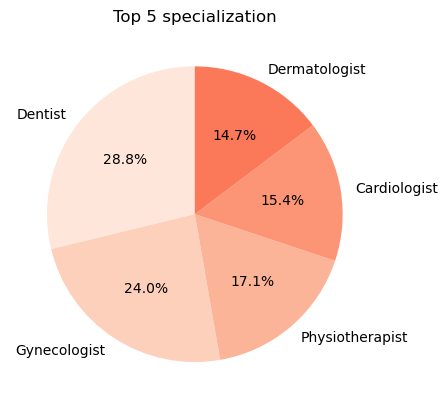

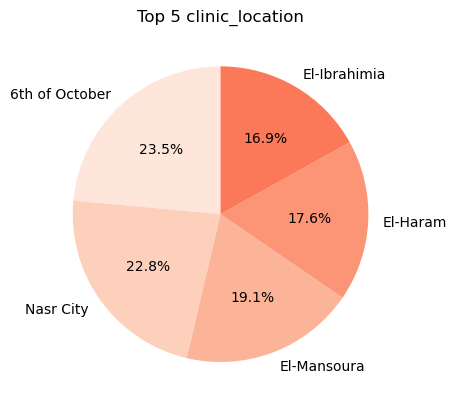

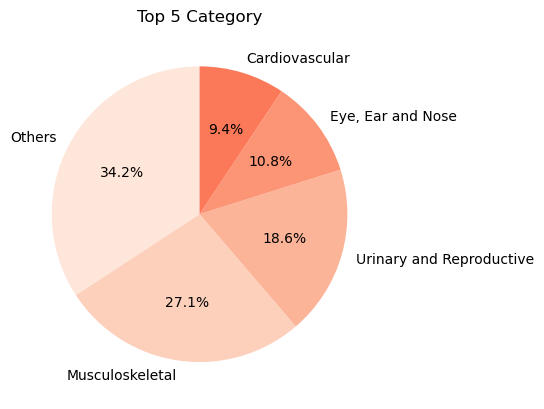

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat.drop('Doctor_Name',axis=1):
    counts = df_merged[col].value_counts()
    plt.pie(
        counts.head(5).values,
        labels=counts.head(5).index,
        colors=colors[:len(counts)],   
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"Top 5 {col}")
    plt.show()
    

## Clinics Distribution

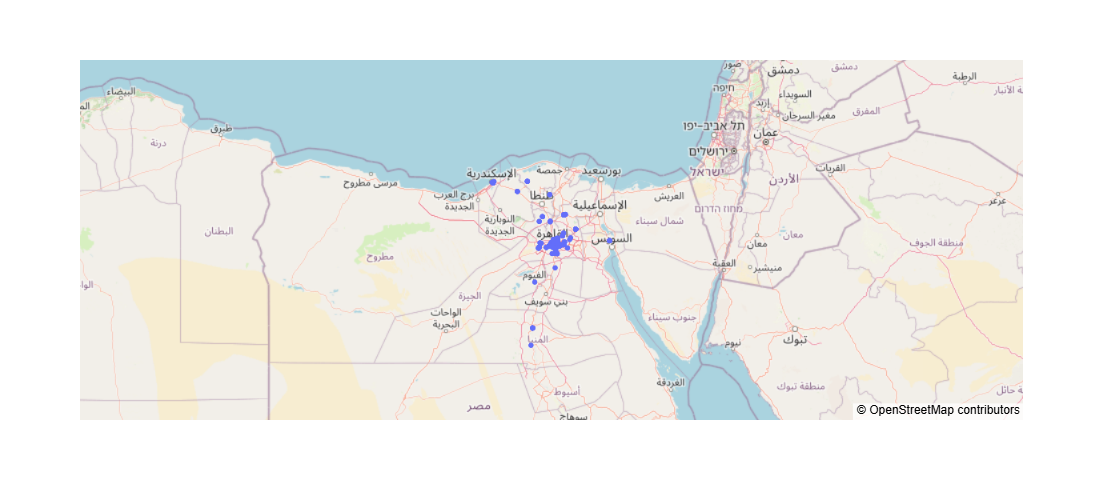

In [239]:
import plotly.express as px
import pandas as pd
accepted_locations=df_merged.dropna()
fig = px.scatter_mapbox(
    accepted_locations,
    lat="latitude",
    lon="longitude",
    hover_name="clinic_location", 
    zoom=5,
    height=500
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [240]:
df_merged

,Doctor_Name,specialization,avg_rate,clinic_location,Category,latitude,longitude
0,Salim El-Shazly,Physiotherapist,5.000000,El-Mansoura,Musculoskeletal,NaN,NaN
6,Hassan El-Kholy,Dermatologist,4.500000,El-Ibrahimia,Skin,28.424375,30.793289
9,Mohamed Youssef,Orthopedist,4.500000,6th of October,Musculoskeletal,29.972346,30.940921
13,Jamal El-Kassas,Gynecologist,4.758471,El-Haram,Urinary and Reproductive,29.994266,31.160459
16,Nader Fahmy,Dermatologist,5.000000,Nasr City,Skin,30.052118,31.342205
...,...,...,...,...,...,...,...
2740,Hani El-Kassas,Urologist,4.000000,El-Mohandessin : shehab street,Urinary and Reproductive,NaN,NaN
2746,Zein Hussein,Hepatologist,4.000000,El-Dokki : altahrir,Gastrointestinal and Liver,NaN,NaN
2747,Salim Nasser,Gynecologist,4.500000,El-Mansoura : abbasi street,Urinary and Reproductive,NaN,NaN
2748,Rania Khalil,Internist,4.000000,Faisal,Others,30.097883,32.485650


In [242]:
df_merged.duplicated().sum()

0

In [243]:
df_merged.isna().sum()

Doctor_Name          0
specialization       0
avg_rate             0
clinic_location      0
Category             0
latitude           459
longitude          459
dtype: int64

In [244]:
df_merged

,Doctor_Name,specialization,avg_rate,clinic_location,Category,latitude,longitude
0,Salim El-Shazly,Physiotherapist,5.000000,El-Mansoura,Musculoskeletal,NaN,NaN
6,Hassan El-Kholy,Dermatologist,4.500000,El-Ibrahimia,Skin,28.424375,30.793289
9,Mohamed Youssef,Orthopedist,4.500000,6th of October,Musculoskeletal,29.972346,30.940921
13,Jamal El-Kassas,Gynecologist,4.758471,El-Haram,Urinary and Reproductive,29.994266,31.160459
16,Nader Fahmy,Dermatologist,5.000000,Nasr City,Skin,30.052118,31.342205
...,...,...,...,...,...,...,...
2740,Hani El-Kassas,Urologist,4.000000,El-Mohandessin : shehab street,Urinary and Reproductive,NaN,NaN
2746,Zein Hussein,Hepatologist,4.000000,El-Dokki : altahrir,Gastrointestinal and Liver,NaN,NaN
2747,Salim Nasser,Gynecologist,4.500000,El-Mansoura : abbasi street,Urinary and Reproductive,NaN,NaN
2748,Rania Khalil,Internist,4.000000,Faisal,Others,30.097883,32.485650
